## Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## Problema 1

Implemente el método de interpolación de Lagrange que ajuste un polinomio de grado 4 a los siguientes datos experimentales.



```
    x_values = 4, 7, 8, 12,  17
    y_values = 8, 16, 3,  5,  0
```

El código debe generar una figura que contenga los puntos asociados a los datos experimentales y la curva generada por el polinomio de Lagrange. Gráfique en el intervalo $[3, 18]$.

In [11]:
X = np.array([ 4, 7, 8, 12,  17])
Y = np.array([ 8, 16, 3,  5,  0])

## tu codigo aqui
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

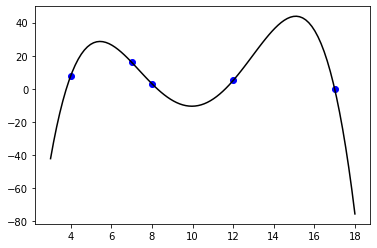

In [12]:
#Gráfica
x = np.linspace(3,18,100)
y = Interpolate(x,X,Y)

plt.scatter(X,Y,marker='o',color='b')
plt.plot(x,y,color='k') 

b) Explique cuál es la intuición detras de la fórmula de interpolación de Lagrange. 

**Respuesta:** La intuición detrás de ésta formula se presenta en realizar aproximaciones lineales para la obtención de puntos a partir de los conocimientos previos de un conjunto dado. 

Se puede entender como si el método generara un polinomio inicial que pasará por un punto específico y se anulará para el resto, generando aproximaciones a medida que avanza por el conjunto de números.

## Problema 2

Diseñe un método que obtenga el valor en $x$ para el cual el polinomio interpolador del problema anterior es máximo. Guarde el resultado obtenido en la variable `x_value`, e imprima ese valor. 

In [38]:
x_value = 0
## tu codigo aqui
x = sym.Symbol('x',real=True)
f = Interpolate(x,X,Y)

F = sym.simplify(f)
DxF = sym.diff(F,x)
DxF1 = sym.lambdify([x],DxF,'numpy')

In [39]:
def Derivate(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

def GetNewtonRaphson(f,df,xn,itmax = 1000, precision=1e-5):
    error = 1
    it = 0

    while error > precision and it <= itmax:
        try:
            xn1 = xn - f(xn)/df(f,xn)
            error = np.abs(f(xn)/df(f,xn))
        except ZeroDivisionError:
            print('Division por cero')
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn
      
def GetAllRoots(x,tolerancia=4):
    Roots = np.array([])
    for i in x:
        root = GetNewtonRaphson(DxF1,Derivate,i)
        if root != False:
            croot = np.round(root, tolerancia)
            if croot not in Roots:
                Roots = np.append(Roots,croot)
    Roots.sort()
    return Roots

In [40]:
values = np.linspace(-3,18,100)
R_roots = GetAllRoots(values)

DxF_ = sym.diff(DxF,x)
DxF2 = sym.lambdify([x],DxF_,'numpy')

for j in R_roots:
    if DxF2(j) <=0:
        if j > x_value:
            x_value = j

# codigo para verificar su resultado (no modificar)
print(x_value)

15.0885
